# Bronchus Segmentation

This example demonstrated how to use the bronchial tree segmentation algorithm used in:

***W. Ghandourh, J. Dowling, P. Chlap et al., “Medical Dosimetry Assessing tumor centrality in lung stereotactic ablative body radiotherapy ( SABR ): the effects of variations in bronchial tree delineation and potential for automated methods,” vol. 46, pp. 94–101, 2021, doi: [10.1016/j.meddos.2020.09.004](https://doi.org/10.1016/j.meddos.2020.09.004).***

## Import Modules

In [1]:
try:
    import platipy
except:
    !pip install platipy
    import platipy

import SimpleITK as sitk

%matplotlib inline

from platipy.imaging.tests.data import get_lung_nifti
from platipy.imaging.projects.bronchus.run import run_bronchus_segmentation
from platipy.imaging import ImageVisualiser
from platipy.imaging.label.utils import get_com

## Download Test Data

This will download lung cancer patient CT scans, with contours of several structures.
This only has to be done once - if it is ran again don't worry, the same data will not be downloaded again!

In [2]:
data_path = get_lung_nifti()

## Load Test Image

Read in the image we want to automatically segment


In [3]:
test_pat_path = data_path.joinpath("LCTSC-Test-S1-201")
test_image = sitk.ReadImage(str(test_pat_path.joinpath("IMAGES/LCTSC_TEST_S1_201_0_CT_0.nii.gz")))

## Run Auto-segmentation

This will take some time, and will print updates along the way


In [4]:
auto_structures = run_bronchus_segmentation(test_image)

Generating Lung Mask...


Generating Lung Mask... Done
-------------------------------


summary of lung intensities.  Mean: -689.7705964524534 sd: 164.05080332949413 median: -729.79296875
*Airway opening: [257, 196, 108]
*Voxel HU at opening: 1
--------------------------------------------
Extracting airways.  Iteration: 0
*Lung Mask HU: -750
*Slices from sup for airway opening: 3


No labels found in mask
--------------------------------------------
Extracting airways.  Iteration: 1
*Lung Mask HU: -775
*Slices from sup for airway opening: 3


No labels found in mask
--------------------------------------------
Extracting airways.  Iteration: 2
*Lung Mask HU: -800
*Slices from sup for airway opening: 3


No labels found in mask
--------------------------------------------
Extracting airways.  Iteration: 3
*Lung Mask HU: -825
*Slices from sup for airway opening: 3


No labels found in mask
--------------------------------------------
Extracting airways.  Iteration: 4
*Lung Mask HU: -850
*Slices from sup for airway opening: 3


No labels found in mask
--------------------------------------------
Extracting airways.  Iteration: 5
*Lung Mask HU: -900
*Slices from sup for airway opening: 3


No labels found in mask
--------------------------------------------
Extracting airways.  Iteration: 6
*Lung Mask HU: -700
*Slices from sup for airway opening: 3


No labels found in mask
--------------------------------------------
Extracting airways.  Iteration: 7
*Lung Mask HU: -950
*Slices from sup for airway opening: 3


No labels found in mask
--------------------------------------------
Extracting airways.  Iteration: 8
*Lung Mask HU: -650
*Slices from sup for airway opening: 3


No labels found in mask
*Airway opening: [259, 201, 102]
*Voxel HU at opening: 1
--------------------------------------------
Extracting airways.  Iteration: 9
*Lung Mask HU: -750
*Slices from sup for airway opening: 10


 Airway Mask size passed: 90033
 Roundness: 0.518584427381907
 Elongation: 3.314440100646848
--------------------------------------------
Extracting airways.  Iteration: 10
*Lung Mask HU: -775
*Slices from sup for airway opening: 10


 Airway Mask size passed: 87987
 Roundness: 0.5206611338884475
 Elongation: 3.3711273033085107
--------------------------------------------
Extracting airways.  Iteration: 11
*Lung Mask HU: -800
*Slices from sup for airway opening: 10


 Airway Mask size passed: 86620
 Roundness: 0.5190044294760688
 Elongation: 3.3937056078327137
--------------------------------------------
Extracting airways.  Iteration: 12
*Lung Mask HU: -825
*Slices from sup for airway opening: 10


 Airway Mask size passed: 84374
 Roundness: 0.5232948774582152
 Elongation: 3.4940802535337427
--------------------------------------------
Extracting airways.  Iteration: 13
*Lung Mask HU: -850
*Slices from sup for airway opening: 10


 Airway Mask size passed: 81954
 Roundness: 0.5269199707802875
 Elongation: 3.5721722733604353
--------------------------------------------
Extracting airways.  Iteration: 14
*Lung Mask HU: -900
*Slices from sup for airway opening: 10


 Airway Mask size passed: 76060
 Roundness: 0.537612318167935
 Elongation: 3.944671084976228
--------------------------------------------
Extracting airways.  Iteration: 15
*Lung Mask HU: -700
*Slices from sup for airway opening: 10


 Airway Mask size failed (> 150000): 1659413
 Roundness: 0.5537332413709152
 Elongation: 1.2750023134566382
--------------------------------------------
Extracting airways.  Iteration: 16
*Lung Mask HU: -950
*Slices from sup for airway opening: 10


 Airway Mask size passed: 59652
 Roundness: 0.6014459998871523
 Elongation: 6.3515641371955995
--------------------------------------------
Extracting airways.  Iteration: 17
*Lung Mask HU: -650
*Slices from sup for airway opening: 10


 Airway Mask size failed (> 150000): 2933049
 Roundness: 0.4764602838161556
 Elongation: 1.4176602059683505
Selected Lung Mask HU: -750


 Cropping from slice: 63 + 13 slices


## Save segmentations
Optionally write the automatic segmentations to disk


In [5]:
output_directory = test_pat_path.joinpath("SEGMENTATIONS")
output_directory.mkdir(exist_ok=True)

for struct_name in list(auto_structures.keys()):
    sitk.WriteImage(auto_structures[struct_name], str(output_directory.joinpath(f"{struct_name}.nii.gz")))

print(f"Segmentations saved to: {output_directory}")



Segmentations saved to: data/nifti/lung/LCTSC-Test-S1-201/SEGMENTATIONS


## Visualise Segmentations

Next, we can generate a nice figure to check what the segmentation looks like

The first step here is to convert SimpleITK images to NumPy arrays

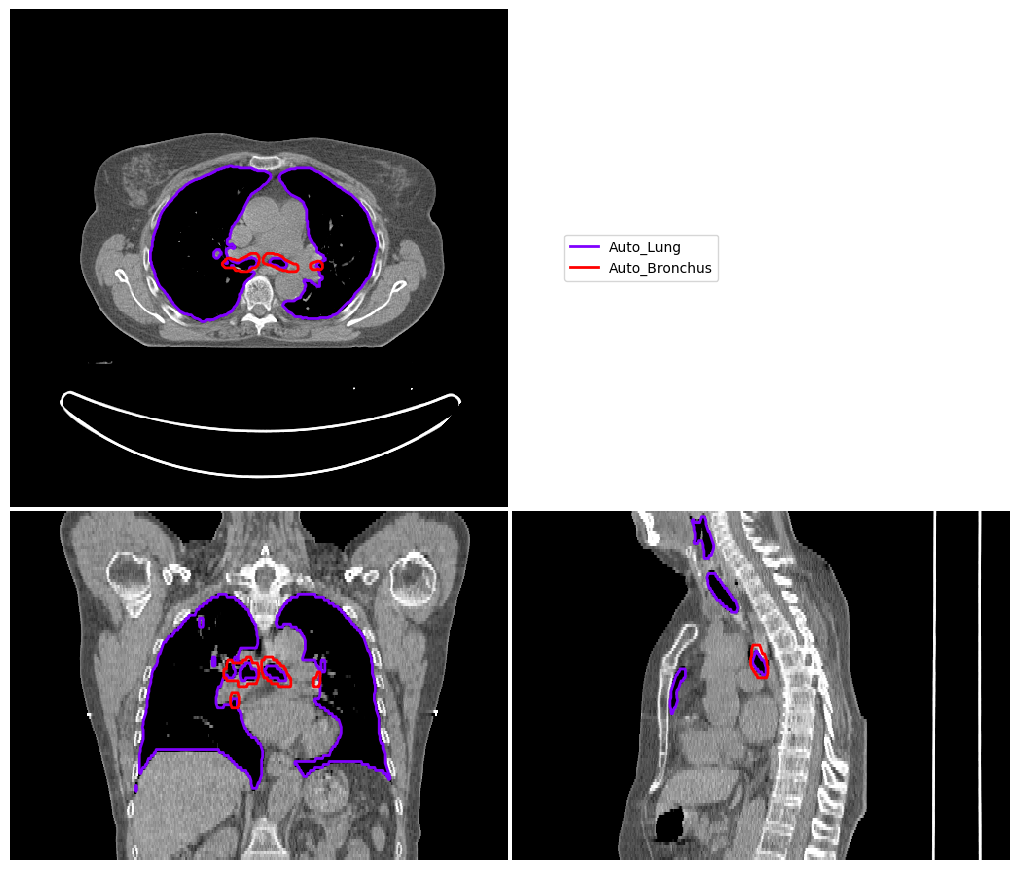

In [6]:
vis = ImageVisualiser(test_image, cut=get_com(auto_structures["Auto_Bronchus"]))

vis.add_contour({struct: auto_structures[struct] for struct in auto_structures.keys()})

fig = vis.show()